<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [40]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [41]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [42]:
#limpiarla por nulos 
Micro_Retailer_filled = Micro_Retailer.isnull().sum()
Micro_Retailer_filled

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [43]:
#remplazar los nulos 
valoresnulos =Micro_Retailer.fillna(method="ffill") 
valoresnulos =Micro_Retailer.fillna(method="bfill") 


/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_12943/1400067044.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  valoresnulos =Micro_Retailer.fillna(method="ffill")
/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_12943/1400067044.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  valoresnulos =Micro_Retailer.fillna(method="bfill")


In [50]:
#otro
Micro_Retailer= Micro_Retailer.fillna("nulos existentes") 

In [51]:
#limpiarla por nulos 
valoresnulos = Micro_Retailer.isnull().sum().sum()
valoresnulos

0

In [52]:
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(2), int64(2), object(102)
memory usage: 141.7+ KB


In [53]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,nulos existentes,nulos existentes,nulos existentes,nulos existentes,nulos existentes,no,nulos existentes,nulos existentes,nulos existentes,nulos existentes
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,nulos existentes,nulos existentes,nulos existentes,nulos existentes,nulos existentes,no,nulos existentes,nulos existentes,nulos existentes,nulos existentes
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,nulos existentes,nulos existentes,nulos existentes,nulos existentes,nulos existentes,no,nulos existentes,nulos existentes,nulos existentes,nulos existentes
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,nulos existentes,nulos existentes,nulos existentes,nulos existentes,nulos existentes,no,nulos existentes,nulos existentes,nulos existentes,nulos existentes
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,nulos existentes,nulos existentes,nulos existentes,nulos existentes,nulos existentes,no,nulos existentes,nulos existentes,nulos existentes,nulos existentes


In [47]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [48]:
# Limitar numero máximo de filas
pd.options.display.max_rows = None

Variable 1 type of store 

In [49]:
#232_type_of_store mi variable 
table2= freq_tbl(Micro_Retailer['232_type_of_store'])
table2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


In [13]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table2[table2['frequency']>1]
Filtro1

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


In [14]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro1.set_index('232_type_of_store')
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


In [8]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
table1

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,27,0.157895,0.284211
1,Aplicación móvil,21,0.122807,0.505263
2,Ninguna,20,0.116959,0.715789
3,"Aplicación móvil,Redes sociales",13,0.076023,0.852632
4,Cuaderno,6,0.035088,0.915789
5,Teléfono,1,0.005848,0.926316
6,"Cuaderno,Redes sociales",1,0.005848,0.936842
7,"Aplicación móvil,De frente",1,0.005848,0.947368
8,Físico,1,0.005848,0.957895
9,"Aplicación móvil,Ninguna",1,0.005848,0.968421


In [15]:
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
232_type_of_store,
Grocery store (aka. nanostore),52
Micro-restaurant (aka. fondita),31
Dairy products,10
Cafeteria,6
Butcher shop,6
Produce (fruits & vegetables),4
Handmade products,2
Papelería,2
objetos,2


Text(0, 0.5, 'Frecuencia')

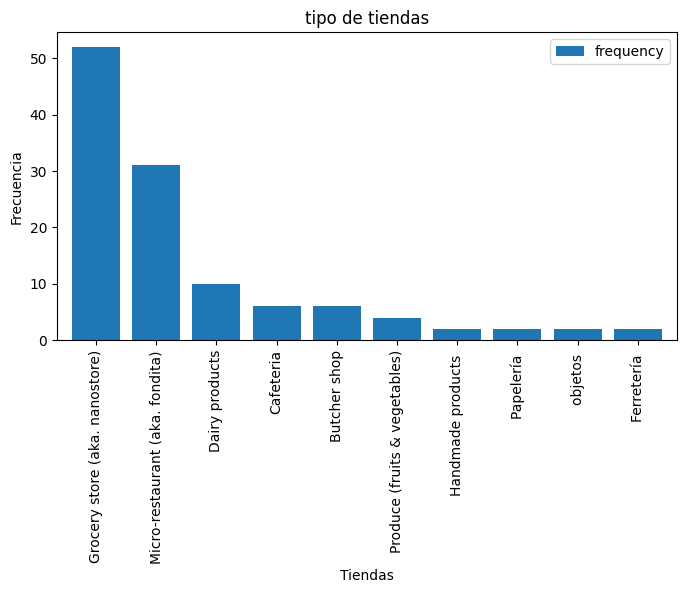

In [16]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('tipo de tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Frecuencia')

variable 2 	_updated_by

In [20]:
#228_store_name mi variable 
table3= freq_tbl(Micro_Retailer['_updated_by'])
table3

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [21]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table3[table3['frequency']>1]
Filtro

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [22]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('_updated_by')
Filtro_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


In [23]:
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
_updated_by,
Salomon Abdala Perez,20
Ángel Francisco Altamirano Campos,16
José Zapata,14
Emilio Garza,13
Benjamin Barbosa,13
Pedro Contreras,12
Eduardo Zárate,9
Alejandro Matias,8
Harry Hernández,7


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

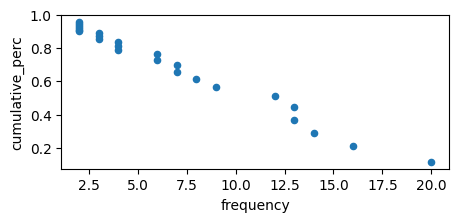

In [24]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter", figsize=(5,2))

<Axes: xlabel='_updated_by'>

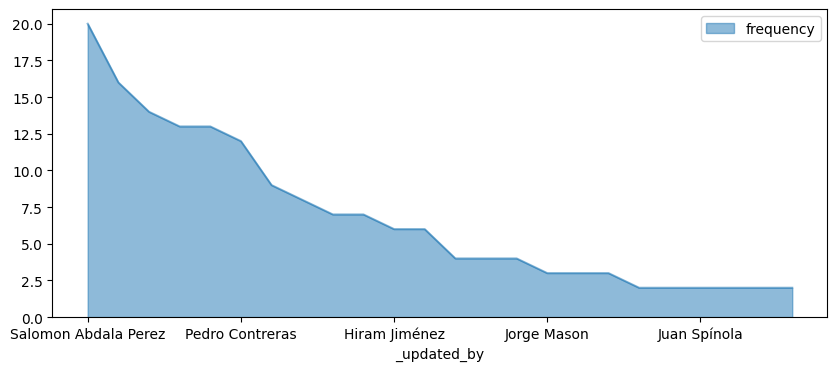

In [25]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index_frequency.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

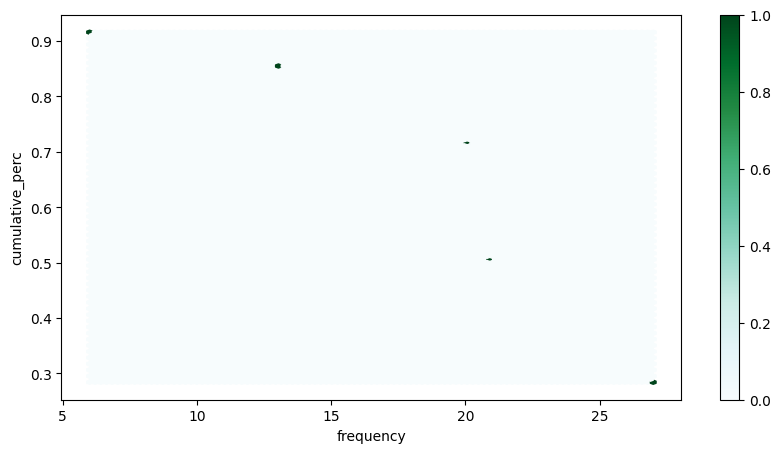

In [29]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [ ]:
variable 3 318_shopkeeper_name

In [55]:
#228_store_name mi variable 
table4= freq_tbl(Micro_Retailer['318_shopkeeper_name'])
table4

,318_shopkeeper_name,frequency,percentage,cumulative_perc
0,nulos existentes,123,0.719298,0.719298
1,Andrea,2,0.011696,0.730994
2,Andrea,2,0.011696,0.742690
3,Fernanda,2,0.011696,0.754386
4,Lourdes,1,0.005848,0.760234
5,Pablo,1,0.005848,0.766082
6,Eduardo,1,0.005848,0.771930
7,Ricardo,1,0.005848,0.777778
8,Leticia,1,0.005848,0.783626
9,Linda,1,0.005848,0.789474


In [69]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table4[table4['frequency']<123]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('318_shopkeeper_name')
Filtro_index
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency


,frequency
318_shopkeeper_name,
Andrea,2
Andrea,2
Fernanda,2
Lourdes,1
Pablo,1
Eduardo,1
Ricardo,1
Leticia,1
Linda,1


<Axes: ylabel='frequency'>

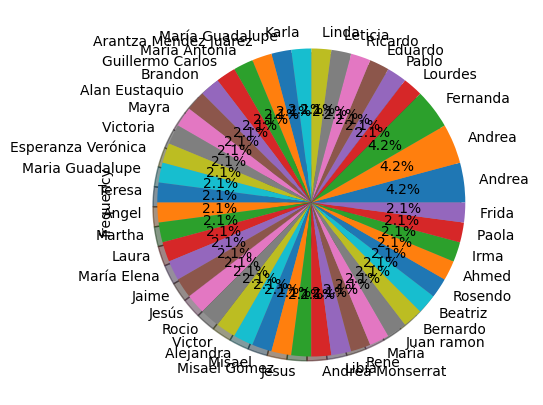

In [70]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")

variable 4 319_shopkeepers_last_name

In [61]:
#228_store_name mi variable 
table5= freq_tbl(Micro_Retailer['319_shopkeepers_last_name'])
table5

,319_shopkeepers_last_name,frequency,percentage,cumulative_perc
0,nulos existentes,125,0.730994,0.730994
1,Guerrero Herrera,1,0.005848,0.736842
2,Chavez Montoya,1,0.005848,0.742690
3,Sorcia,1,0.005848,0.748538
4,Guevara,1,0.005848,0.754386
5,Morales Paez,1,0.005848,0.760234
6,Lindero Palomares,1,0.005848,0.766082
7,Piña Aguilar,1,0.005848,0.771930
8,Albarado,1,0.005848,0.777778
9,Mendez Juárez,1,0.005848,0.783626


In [64]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table5[table5['frequency']<125]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('319_shopkeepers_last_name')
Filtro_index
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
319_shopkeepers_last_name,
Guerrero Herrera,1
Chavez Montoya,1
Sorcia,1
Guevara,1
Morales Paez,1
Lindero Palomares,1
Piña Aguilar,1
Albarado,1
Mendez Juárez,1


Text(0, 0.5, 'Frecuencia')

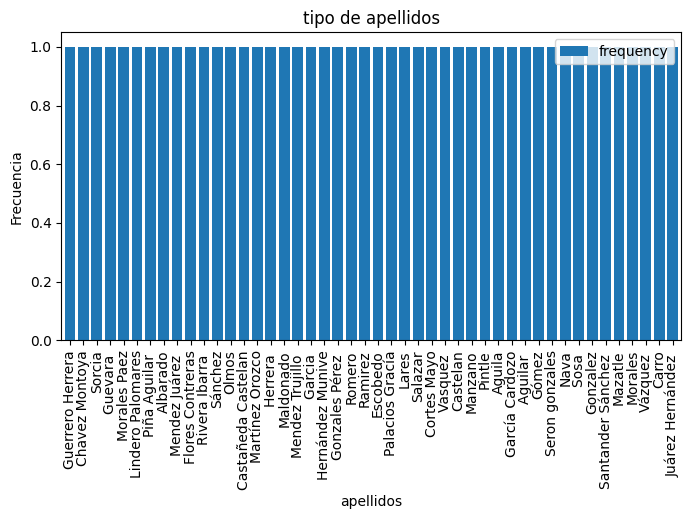

In [65]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('tipo de apellidos')
plt.xlabel('apellidos')
plt.ylabel('Frecuencia')

In [ ]:
variable 5 261_technology_organization

In [66]:
# mi variable 
table5= freq_tbl(Micro_Retailer['261_technology_organization'])
table5

,261_technology_organization,frequency,percentage,cumulative_perc
0,nulos existentes,102,0.596491,0.596491
1,Totalmente de acuerdo,28,0.163743,0.760234
2,De acuerdo,25,0.146199,0.906433
3,Totalmente en desacuerdo,9,0.052632,0.959064
4,Ni de acuerdo ni en desacuerdo,5,0.029240,0.988304
5,En desacuerdo,2,0.011696,1.000000


In [67]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table5[table5['frequency']<102]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('261_technology_organization')
Filtro_index
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
261_technology_organization,
Totalmente de acuerdo,28
De acuerdo,25
Totalmente en desacuerdo,9
Ni de acuerdo ni en desacuerdo,5
En desacuerdo,2


<Axes: ylabel='frequency'>

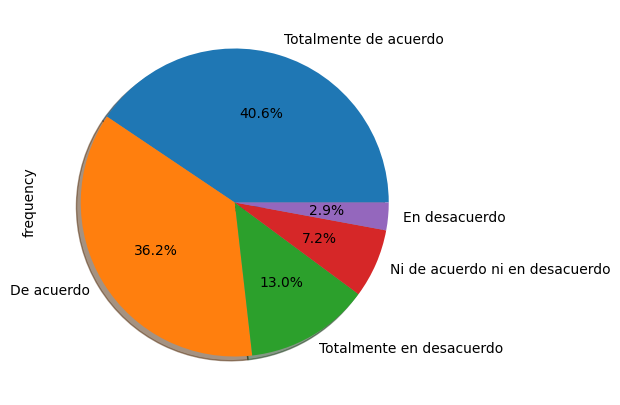

In [68]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")

In [ ]:
variable 6 262_technology_serve_customers

In [72]:
# mi variable 
table5= freq_tbl(Micro_Retailer['262_technology_serve_customers'])
table5

,262_technology_serve_customers,frequency,percentage,cumulative_perc
0,nulos existentes,100,0.584795,0.584795
1,De acuerdo,25,0.146199,0.730994
2,Totalmente de acuerdo,20,0.116959,0.847953
3,Totalmente en desacuerdo,12,0.070175,0.918129
4,Ni de acuerdo ni en desacuerdo,11,0.064327,0.982456
5,En desacuerdo,3,0.017544,1.000000


In [73]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table5[table5['frequency']<100]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('262_technology_serve_customers')
Filtro_index
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
262_technology_serve_customers,
De acuerdo,25
Totalmente de acuerdo,20
Totalmente en desacuerdo,12
Ni de acuerdo ni en desacuerdo,11
En desacuerdo,3


Text(0, 0.5, 'Frecuencia')

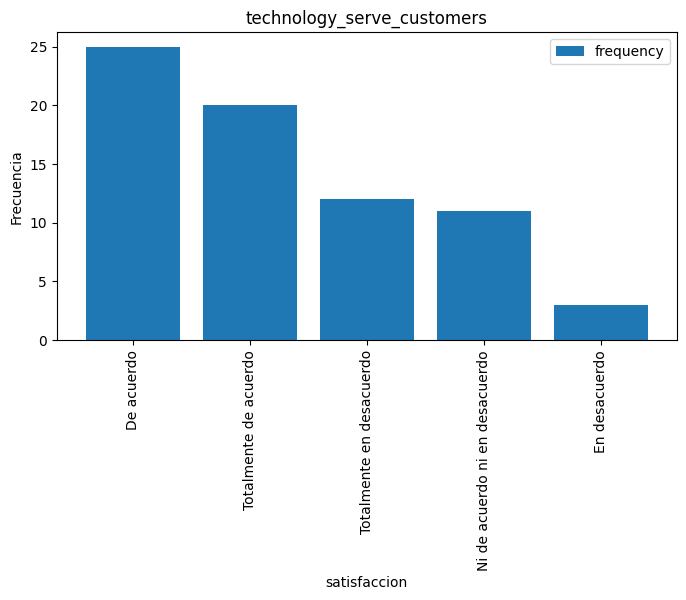

In [74]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('technology_serve_customers')
plt.xlabel('satisfaccion')
plt.ylabel('Frecuencia')

variable 7 263_technology_secure_sales

In [75]:
# mi variable 
table5= freq_tbl(Micro_Retailer['263_technology_secure_sales'])
table5

,263_technology_secure_sales,frequency,percentage,cumulative_perc
0,nulos existentes,101,0.590643,0.590643
1,De acuerdo,29,0.169591,0.760234
2,Totalmente de acuerdo,14,0.081871,0.842105
3,Totalmente en desacuerdo,13,0.076023,0.918129
4,Ni de acuerdo ni en desacuerdo,8,0.046784,0.964912
5,En desacuerdo,6,0.035088,1.000000


In [77]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table5[table5['frequency']<101]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('263_technology_secure_sales')
Filtro_index
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
263_technology_secure_sales,
De acuerdo,29
Totalmente de acuerdo,14
Totalmente en desacuerdo,13
Ni de acuerdo ni en desacuerdo,8
En desacuerdo,6


<Axes: ylabel='frequency'>

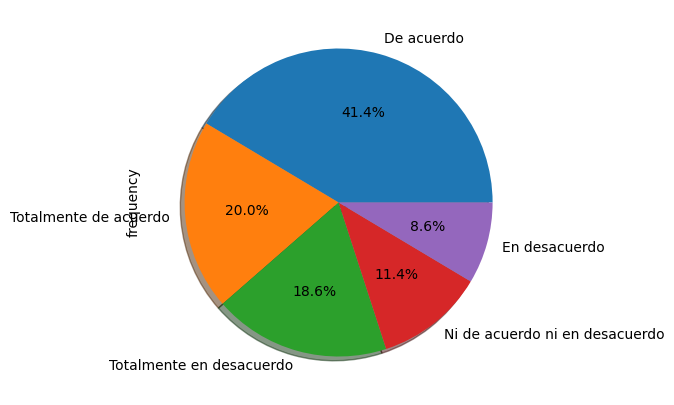

In [78]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f%%")

variable 8 264_technology_budget

In [80]:
# mi variable 
table5= freq_tbl(Micro_Retailer['264_technology_budget'])
table5

,264_technology_budget,frequency,percentage,cumulative_perc
0,nulos existentes,101,0.590643,0.590643
1,Totalmente en desacuerdo,30,0.175439,0.766082
2,De acuerdo,15,0.087719,0.853801
3,En desacuerdo,9,0.052632,0.906433
4,Totalmente de acuerdo,9,0.052632,0.959064
5,Ni de acuerdo ni en desacuerdo,7,0.040936,1.000000


In [81]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table5[table5['frequency']<101]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('264_technology_budget')
Filtro_index
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
264_technology_budget,
Totalmente en desacuerdo,30
De acuerdo,15
En desacuerdo,9
Totalmente de acuerdo,9
Ni de acuerdo ni en desacuerdo,7


Text(0, 0.5, 'Frecuencia')

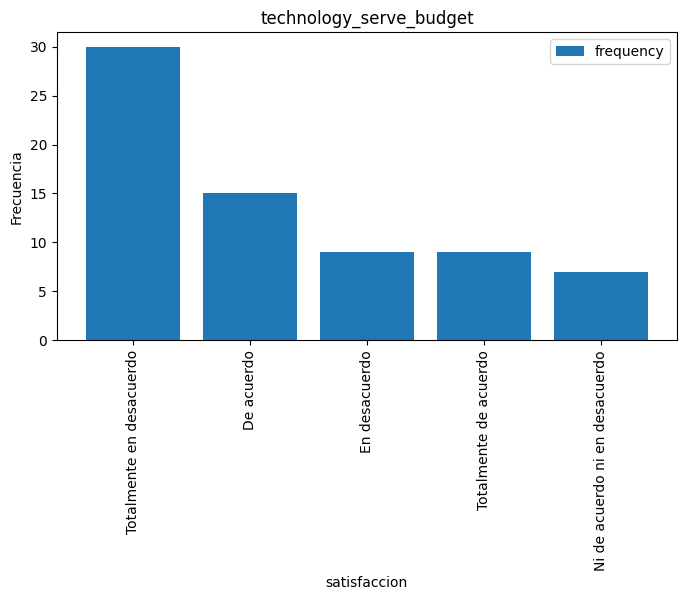

In [82]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('technology_serve_budget')
plt.xlabel('satisfaccion')
plt.ylabel('Frecuencia')